## Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
data = pd.read_csv('scrapy/vlrgg/playerData/vlr.csv')
data['date'] = data['date'].apply(lambda x: datetime.strptime(x,'%d-%m-%y'))
data['playerHS'] = data['playerHS'].apply(lambda x: float(str(x).split('%')[0]))

In [3]:
#cleaning data: getting rid of games with less than 10 players
games = data['gameID'].unique()
for game in games:
    if len(data[data['gameID']==game])!=10:
        data = data.drop(data[data['gameID']==game].index)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138400 entries, 0 to 140355
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   playerName        138399 non-null  object        
 1   playerTeam        138360 non-null  object        
 2   map               138400 non-null  object        
 3   playerAgent       138400 non-null  object        
 4   playerKills       138400 non-null  float64       
 5   playerDeaths      138400 non-null  float64       
 6   playerAssists     138400 non-null  float64       
 7   playerACS         138220 non-null  float64       
 8   playerADR         138150 non-null  float64       
 9   playerHS          138230 non-null  float64       
 10  playerFirstBlood  138230 non-null  float64       
 11  playerFirstDeath  138160 non-null  float64       
 12  matchID           138400 non-null  object        
 13  gameID            138400 non-null  object        
 14  oppo

# Data Exploration

## Agent pick rate over time

In [5]:
data.columns

Index(['playerName', 'playerTeam', 'map', 'playerAgent', 'playerKills',
       'playerDeaths', 'playerAssists', 'playerACS', 'playerADR', 'playerHS',
       'playerFirstBlood', 'playerFirstDeath', 'matchID', 'gameID', 'opponent',
       'result', 'winnerRoundsWon', 'loserRoundsWon', 'winningTeam', 'date',
       'event'],
      dtype='object')

In [6]:

sorted_events = data.sort_values('date')['event'].unique()

In [7]:
#agent pick rate over time
agentdata = data.groupby(['event'])['playerAgent'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
agentdata = agentdata.reindex(sorted_events)
agentdata.head()

playerAgent,astra,breach,brimstone,cypher,jett,kayo,killjoy,omen,phoenix,raze,reyna,sage,skye,sova,viper,yoru
event,,,,,,,,,,,,,,,,
Champions Tour LATAM Stage 1: Challengers 1,0.0,4.823529,6.470588,12.588235,15.764706,0.0,6.117647,13.529412,4.588235,12.705882,3.058824,3.411765,0.235294,16.705882,0.000000,0.000000
Champions Tour Brazil Stage 1: Challengers 1,0.0,1.551724,3.103448,9.482759,13.620690,0.0,10.000000,16.896552,2.241379,15.862069,4.482759,3.793103,0.172414,18.793103,0.000000,0.000000
Champions Tour North America Stage 1: Challengers 1,0.0,2.302632,3.223684,11.677632,16.184211,0.0,7.171053,16.578947,6.743421,8.157895,6.381579,2.664474,1.546053,16.414474,0.625000,0.328947
Champions Tour Malaysia & Singapore Stage 1: Challengers 1,0.0,3.833333,7.500000,7.666667,15.333333,0.0,10.166667,11.833333,2.500000,11.666667,7.166667,3.833333,0.333333,17.166667,1.000000,0.000000
Champions Tour Thailand Stage 1: Challengers 1,0.0,10.714286,5.000000,10.357143,14.642857,0.0,9.642857,14.285714,3.928571,10.357143,4.285714,2.142857,0.000000,13.928571,0.714286,0.000000


<AxesSubplot:xlabel='event'>

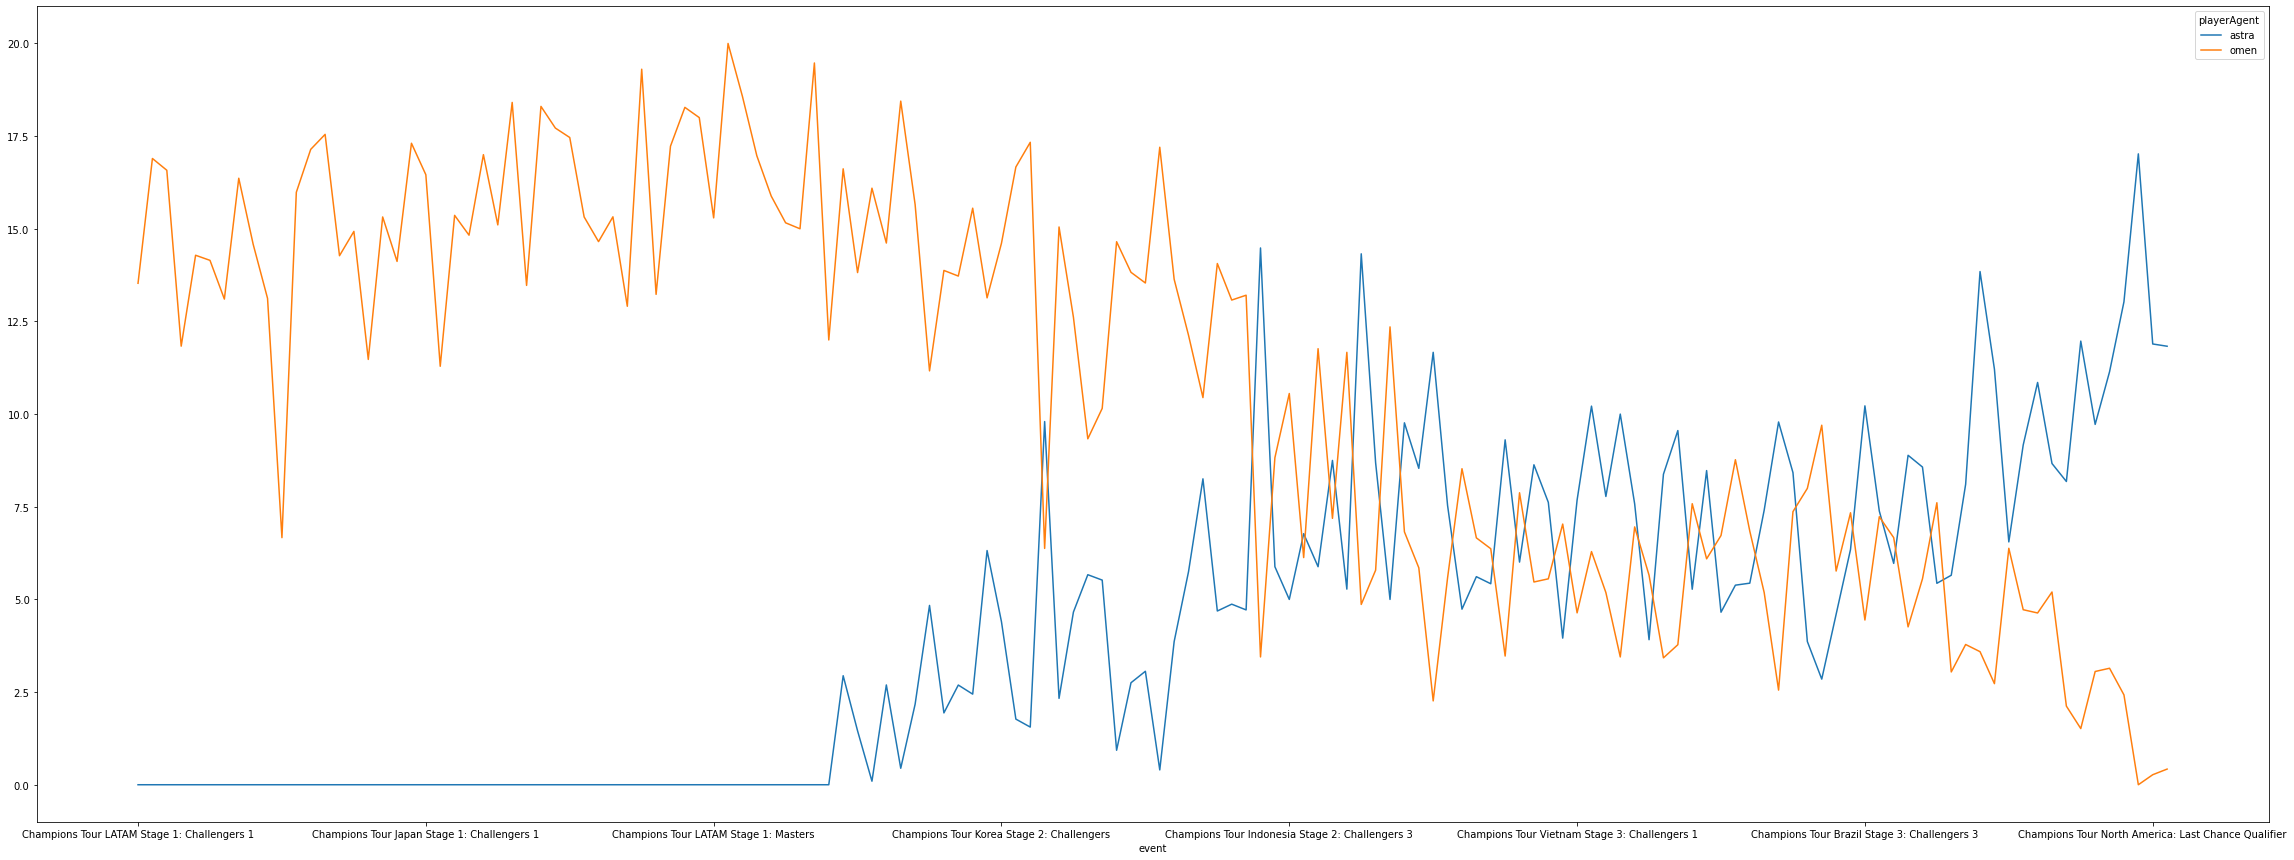

In [8]:
agentdata.plot(figsize=(40,15), y=['astra', 'omen'])
#plt.xticks(ticks=range(0,len(agentdata.index)),labels=agentdata.index.tolist(), rotation=45)
#not all events labeled in the X axis, uncomment above to see all labels

In [9]:
#finding top 5 most played agents for each map in each stage
#see win rates of teams that have 5,4,3,2,1, and 0 agents from the top 5 in that stage
#jan-april stage 1
#april-july stage2
#august-nov stage3
#december campions
data['stage']='unsorted'
data.loc[data['date'].between('2020-10-01','2021-03-01', inclusive=True), 'stage']='stage1'
data.loc[data['date'].between('2021-03-01','2021-08-01', inclusive=False), 'stage']='stage2'
data.loc[data['date'].between('2021-08-01','2021-10-15', inclusive=True), 'stage']='stage3'
data.loc[data['date'].between('2021-10-16','2021-12-15', inclusive=False), 'stage']='champions'

data.head()


,playerName,playerTeam,map,playerAgent,playerKills,playerDeaths,playerAssists,playerACS,playerADR,playerHS,...,matchID,gameID,opponent,result,winnerRoundsWon,loserRoundsWon,winningTeam,date,event,stage
0,stax,VS,Haven,breach,22.0,11.0,5.0,262.0,157.0,53.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions
1,Rb,VS,Haven,skye,13.0,10.0,7.0,212.0,158.0,33.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions
2,k1Ng,VS,Haven,killjoy,13.0,13.0,3.0,212.0,158.0,24.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions
3,MaKo,VS,Haven,astra,13.0,8.0,6.0,209.0,154.0,24.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions
4,BuZz,VS,Haven,jett,14.0,12.0,6.0,206.0,152.0,38.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions


In [10]:
agentpickrate = data.groupby(['stage', 'map'])['playerAgent'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
agentpickrate= agentpickrate.drop(index='unsorted')
agentpickrate
#fracture wasn't played a lot so averages are not very representative of all teams 

playerAgent             astra     breach  brimstone     cypher       jett  \
stage     map                                                               
champions Ascent    19.444444   0.000000   0.000000   4.444444  18.888889   
          Bind      16.153846   0.000000   3.846154   0.000000   9.230769   
          Breeze     0.000000   0.000000   0.476190  12.857143  20.000000   
          Fracture  15.000000  20.000000   3.333333  13.333333  11.666667   
          Haven     19.444444   7.777778   0.000000   6.666667  18.888889   
          Icebox     0.000000   0.000000   0.000000   0.000000  20.000000   
          Split     17.647059   6.470588   0.000000   7.058824  10.000000   
stage1    Ascent     0.000000   5.268240   2.467811   6.512876  16.984979   
          Bind       0.000000   5.267490   8.696845  13.799726  11.975309   
          Haven      0.000000   5.639205   2.514205  13.125000  16.619318   
          Icebox     0.000000   1.019108   1.464968   1.878981  17.133758   
          Split      0.000000  11.699346   2.941176   9.281046  13.442266   
stage2    Ascent     6.163201   3.162024   0.729698   4.954884  15.307964   
          Bind       5.309179   3.125604   6.879227   8.570048   8.705314   
          Breeze     0.881459   0.547112   0.516717   9.665653  18.176292   
          Haven      6.128064   3.981991   0.940470  11.685843  15.567784   
          Icebox     0.403818   0.374449   0.205580   0.690162  17.584435   
          Split      6.222222   8.365079   1.436508   9.047619  10.555556   
stage3    Ascent    13.349282   1.578947   0.095694   3.684211  17.846890   
          Bind      10.294118   3.088235   7.009804   1.813725   7.892157   
          Breeze     0.666667   0.095238   0.476190  12.571429  19.333333   
          Haven     12.994350   3.502825   0.282486   8.700565  19.039548   
          Icebox     0.182927   0.487805   0.060976   0.304878  19.512195   
          Split     13.877551   5.510204   0.748299   6.870748  11.904762   

playerAgent             kayo    killjoy       omen   phoenix       raze  \
stage     map                                                             
champions Ascent    5.555556  15.000000   0.555556  0.000000   0.555556   
          Bind      3.076923   0.769231   0.000000  0.000000  11.538462   
          Breeze    7.142857   5.238095   0.000000  0.000000   0.000000   
          Fracture  1.666667   6.666667   0.000000  0.000000  10.000000   
          Haven     1.111111  13.333333   0.555556  1.111111   1.666667   
          Icebox    1.666667   4.444444   0.000000  0.000000   2.777778   
          Split     1.176471   8.235294   2.352941  0.000000  14.117647   
stage1    Ascent    0.000000  12.328326  17.542918  3.047210   5.826180   
          Bind      0.000000   3.923182  11.179698  4.115226  15.349794   
          Haven     0.000000   5.454545  17.457386  6.363636   6.803977   
          Icebox    0.000000  12.579618  10.923567  0.796178   6.878981   
          Split     0.000000   9.237473  16.949891  1.111111  16.535948   
stage2    Ascent    0.823852  13.413103  13.079639  3.601412   5.861122   
          Bind      0.623188   3.681159   7.560386  2.342995  15.545894   
          Breeze    0.273556   2.765957   1.732523  0.364742   0.151976   
          Haven     0.900450   7.048524  12.946473  4.957479   5.932966   
          Icebox    0.323054   8.847283   4.082232  0.256975   4.126285   
          Split     0.738095   8.936508  12.079365  0.388889  15.904762   
stage3    Ascent    2.248804  14.210526   6.698565  2.488038   2.918660   
          Bind      1.813725   2.696078   2.647059  0.392157  15.588235   
          Breeze    0.476190   4.000000   0.571429  0.000000   0.095238   
          Haven     1.525424  10.169492   6.779661  3.559322   1.807910   
          Icebox    0.121951   9.146341   0.609756  0.000000   2.195122   
          Split     2.244898  10.748299   5.374150  0.068027  13.265306   

playerAgent             reyna       sage      

Text(0.5, 1.0, 'Champions Agent Pick Rates')

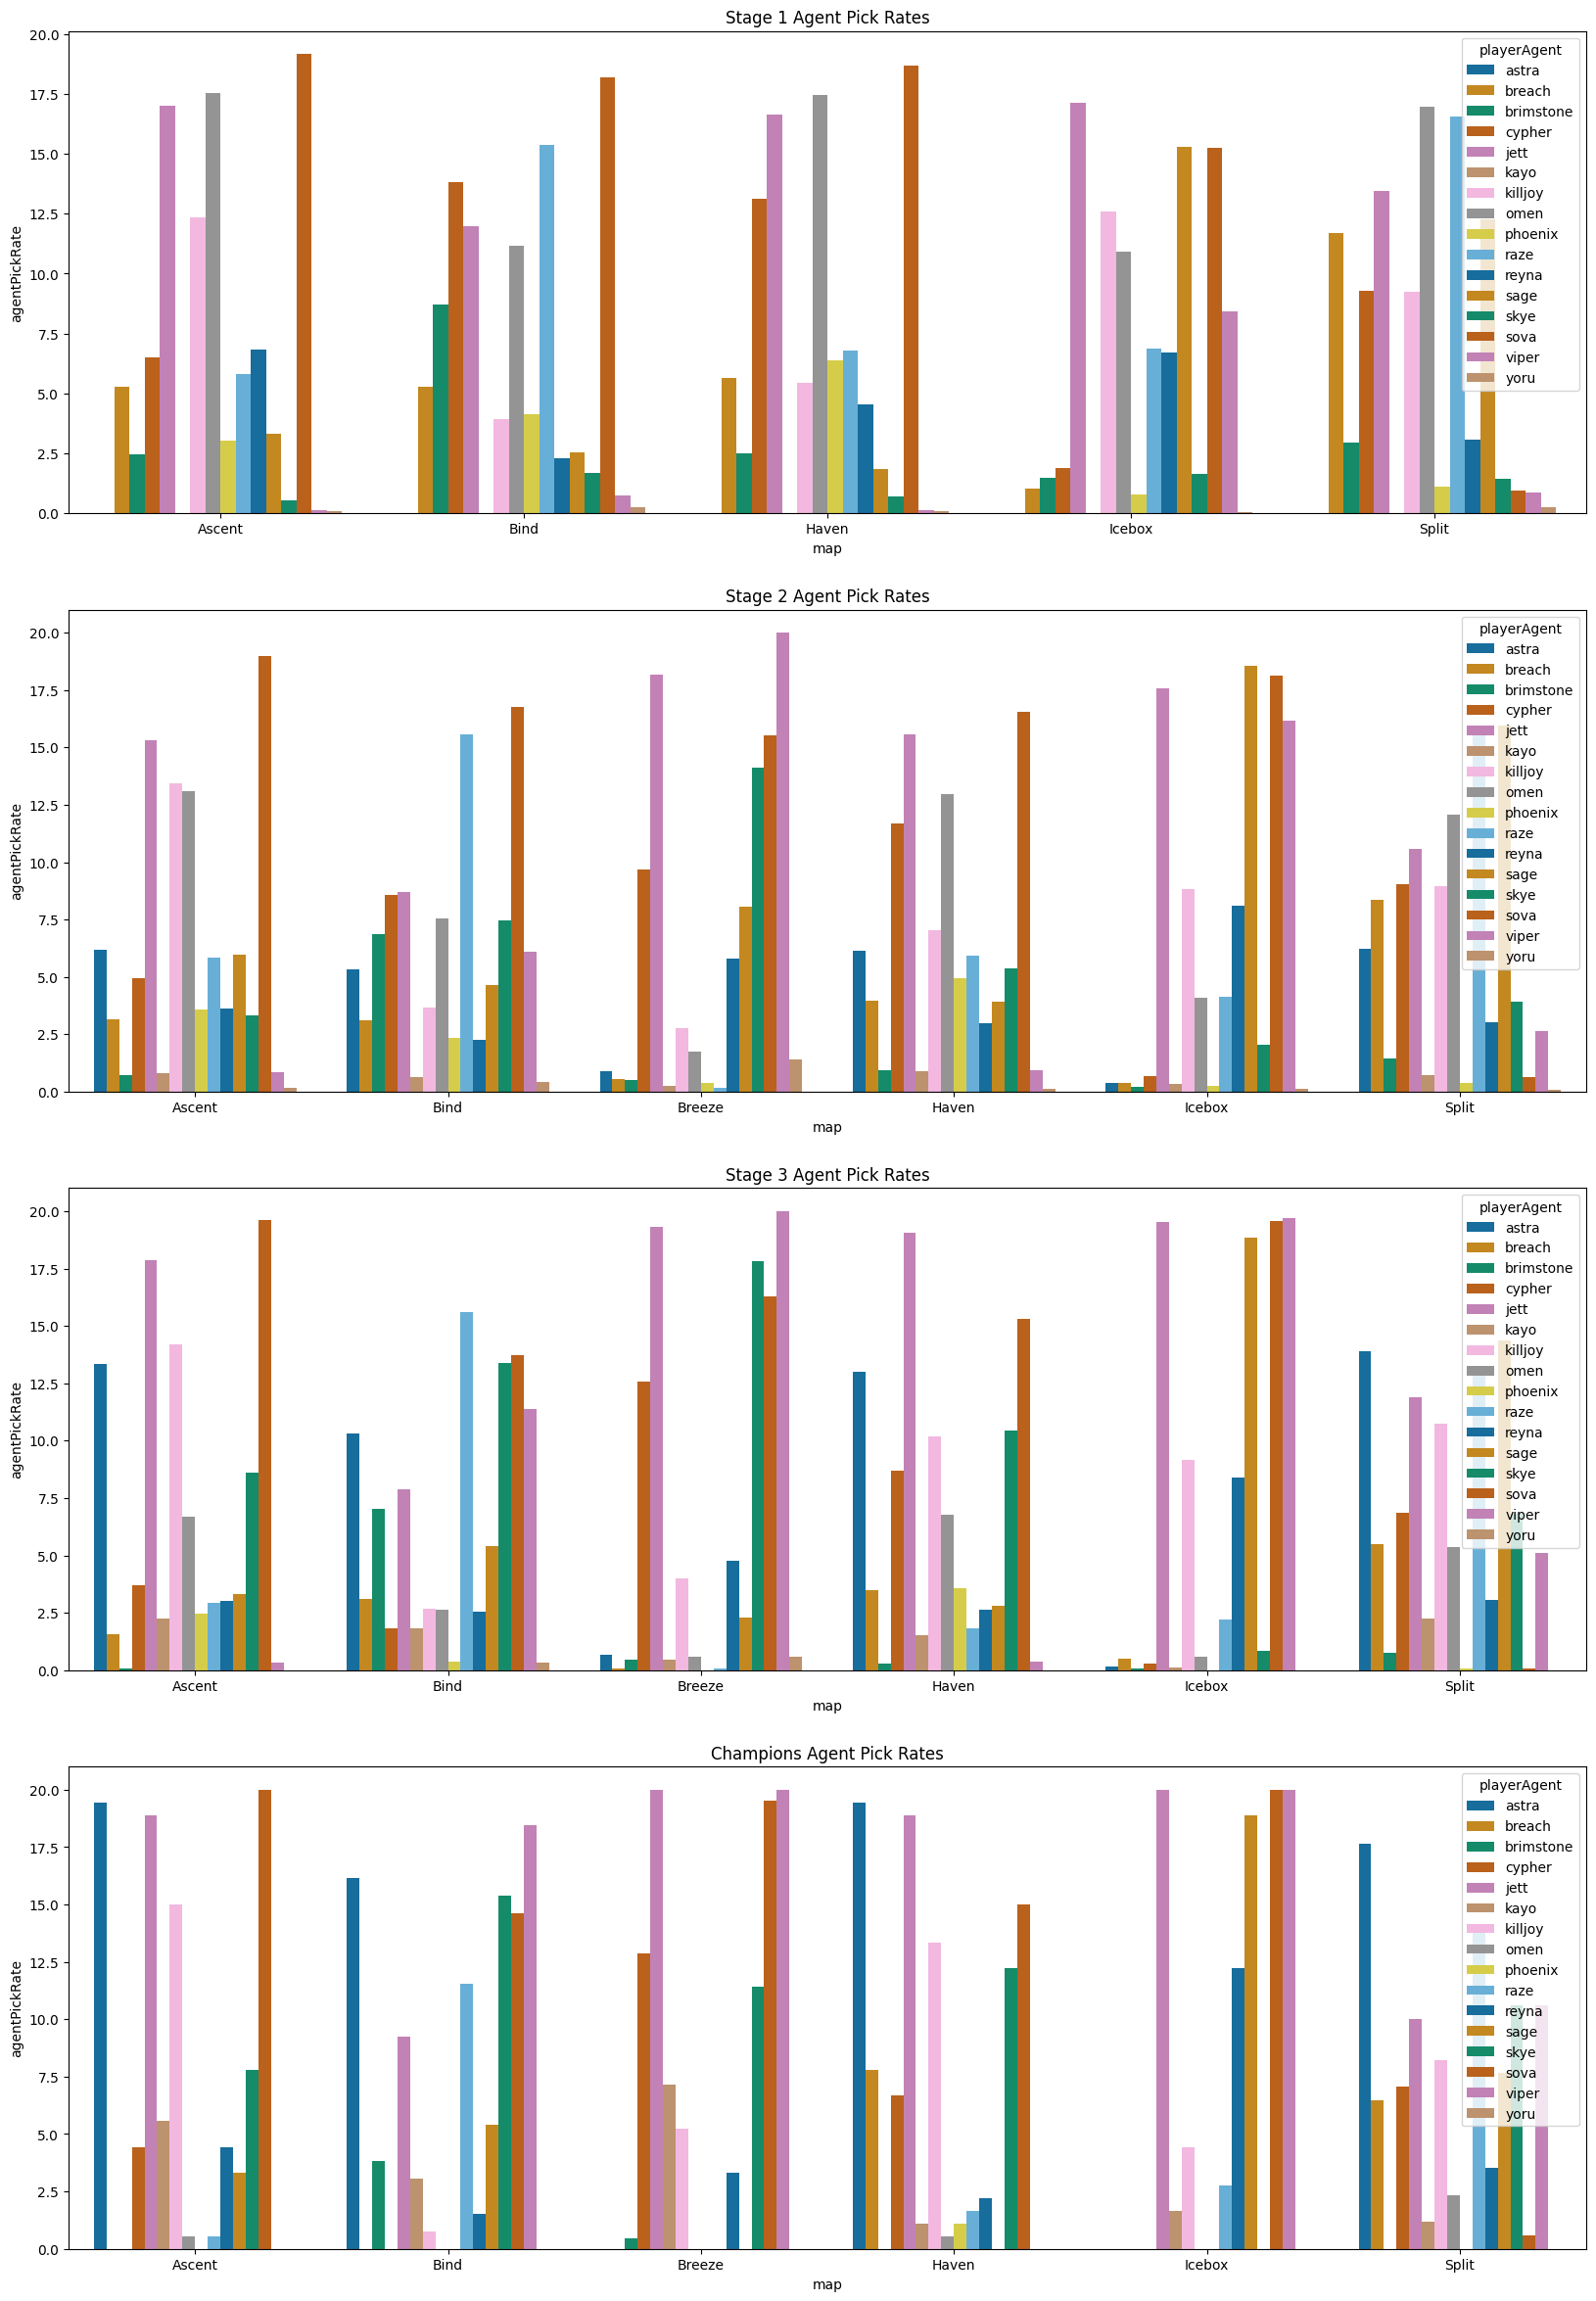

In [53]:
fig, ax = plt.subplots(figsize=(20, 30), dpi=100, nrows=4)
plotdata = pd.melt(agentpickrate.reset_index(), id_vars=['map', 'stage'], value_name='agentPickRate')
plotdata_champions = pd.melt(agentpickrate.loc['champions'].reset_index(), id_vars='map', value_name='agentPickRate')
plotdata_champions = plotdata_champions.drop(plotdata_champions[plotdata_champions['map']=='Fracture'].index)
#drop fracture since it was not played a lot this year


sns.barplot(data=plotdata[plotdata['stage']=='stage1'], ax=ax[0], x='map', hue='playerAgent', y='agentPickRate', palette='colorblind', alpha=1).set_title('Stage 1 Agent Pick Rates')
sns.barplot(data=plotdata[plotdata['stage']=='stage2'], ax=ax[1], x='map', hue='playerAgent', y='agentPickRate', palette='colorblind', alpha=1).set_title('Stage 2 Agent Pick Rates')
sns.barplot(data=plotdata[plotdata['stage']=='stage3'], ax=ax[2], x='map', hue='playerAgent', y='agentPickRate', palette='colorblind', alpha=1).set_title('Stage 3 Agent Pick Rates')
sns.barplot(data=plotdata_champions, ax=ax[3], x='map', hue='playerAgent', y='agentPickRate', palette='colorblind', alpha=1).set_title('Champions Agent Pick Rates')

In [12]:
#agent pick rates with roles
duelist = ['jett', 'phoenix', 'raze', 'reyna', 'yoru', 'neon']
controller = ['brimstone', 'viper', 'omen', 'astra']
initiator = ['sova', 'breach', 'skye', 'kayo']
sentinel = ['sage', 'killjoy', 'cypher', 'chamber']

def agentClassifier(input_agent):
    if input_agent in duelist:
        return 'duelist'
    if input_agent in controller:
        return 'controller'
    if input_agent in initiator:
        return 'initiator'
    if input_agent in sentinel:
        return 'sentinel'

data['agentType'] = data['playerAgent'].apply(lambda x: agentClassifier(x))
data.head()

,playerName,playerTeam,map,playerAgent,playerKills,playerDeaths,playerAssists,playerACS,playerADR,playerHS,...,gameID,opponent,result,winnerRoundsWon,loserRoundsWon,winningTeam,date,event,stage,agentType
0,stax,VS,Haven,breach,22.0,11.0,5.0,262.0,157.0,53.0,...,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions,initiator
1,Rb,VS,Haven,skye,13.0,10.0,7.0,212.0,158.0,33.0,...,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions,initiator
2,k1Ng,VS,Haven,killjoy,13.0,13.0,3.0,212.0,158.0,24.0,...,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions,sentinel
3,MaKo,VS,Haven,astra,13.0,8.0,6.0,209.0,154.0,24.0,...,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions,controller
4,BuZz,VS,Haven,jett,14.0,12.0,6.0,206.0,152.0,38.0,...,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions,duelist


In [24]:
data.groupby([ 'map'])['agentType'].value_counts(normalize=True).mul(5).unstack(fill_value=0)
#overall duelists are the more popular agent for each map
#for the most part only 1 controller is used for each map

agentType,controller,duelist,initiator,sentinel
map,,,,
Ascent,1.031385,1.472387,1.316272,1.179957
Bind,1.250828,1.510762,1.379967,0.858444
Breeze,1.134066,1.275824,1.590110,1.000000
Fracture,1.416667,1.083333,1.333333,1.166667
Haven,1.035677,1.528438,1.334195,1.101689
Icebox,1.040301,1.522300,1.019882,1.417517
Split,1.114589,1.545889,0.693899,1.645623


In [34]:
data.groupby(['stage', 'map'])['agentType'].value_counts(normalize=True).mul(5).unstack(fill_value=0).drop('unsorted')
#looks like the addition of astra caused the meta to shift towards 2 controllers on bind


agentType           controller   duelist  initiator  sentinel
stage     map                                                
champions Ascent      1.000000  1.194444   1.666667  1.138889
          Bind        1.923077  1.115385   1.653846  0.307692
          Breeze      1.023810  1.166667   1.904762  0.904762
          Fracture    1.416667  1.083333   1.333333  1.166667
          Haven       1.000000  1.194444   1.805556  1.000000
          Icebox      1.000000  1.750000   1.083333  1.166667
          Split       1.529412  1.382353   0.941176  1.147059
stage1    Ascent      1.006438  1.637339   1.248927  1.107296
          Bind        1.030178  1.699588   1.256516  1.013717
          Haven       1.004972  1.722301   1.250710  1.022017
          Icebox      1.041401  1.576433   0.894904  1.487261
          Split       1.038126  1.718954   0.704793  1.538126
stage2    Ascent      1.041389  1.427619   1.314045  1.216948
          Bind        1.292029  1.464251   1.399275  0.844444
          Breeze      1.156535  1.294833   1.524316  1.024316
          Haven       1.048024  1.478989   1.340670  1.132316
          Icebox      1.042217  1.508811   1.043686  1.405286
          Split       1.119444  1.500000   0.682937  1.697619
stage3    Ascent      1.023923  1.313397   1.602871  1.059809
          Bind        1.566176  1.338235   1.600490  0.495098
          Breeze      1.085714  1.238095   1.733333  0.942857
          Haven       1.022599  1.353107   1.539548  1.084746
          Icebox      1.027439  1.506098   1.051829  1.414634
          Split       1.255102  1.414966   0.731293  1.598639

Text(0.5, 1.0, 'Average Team composition in Champions')

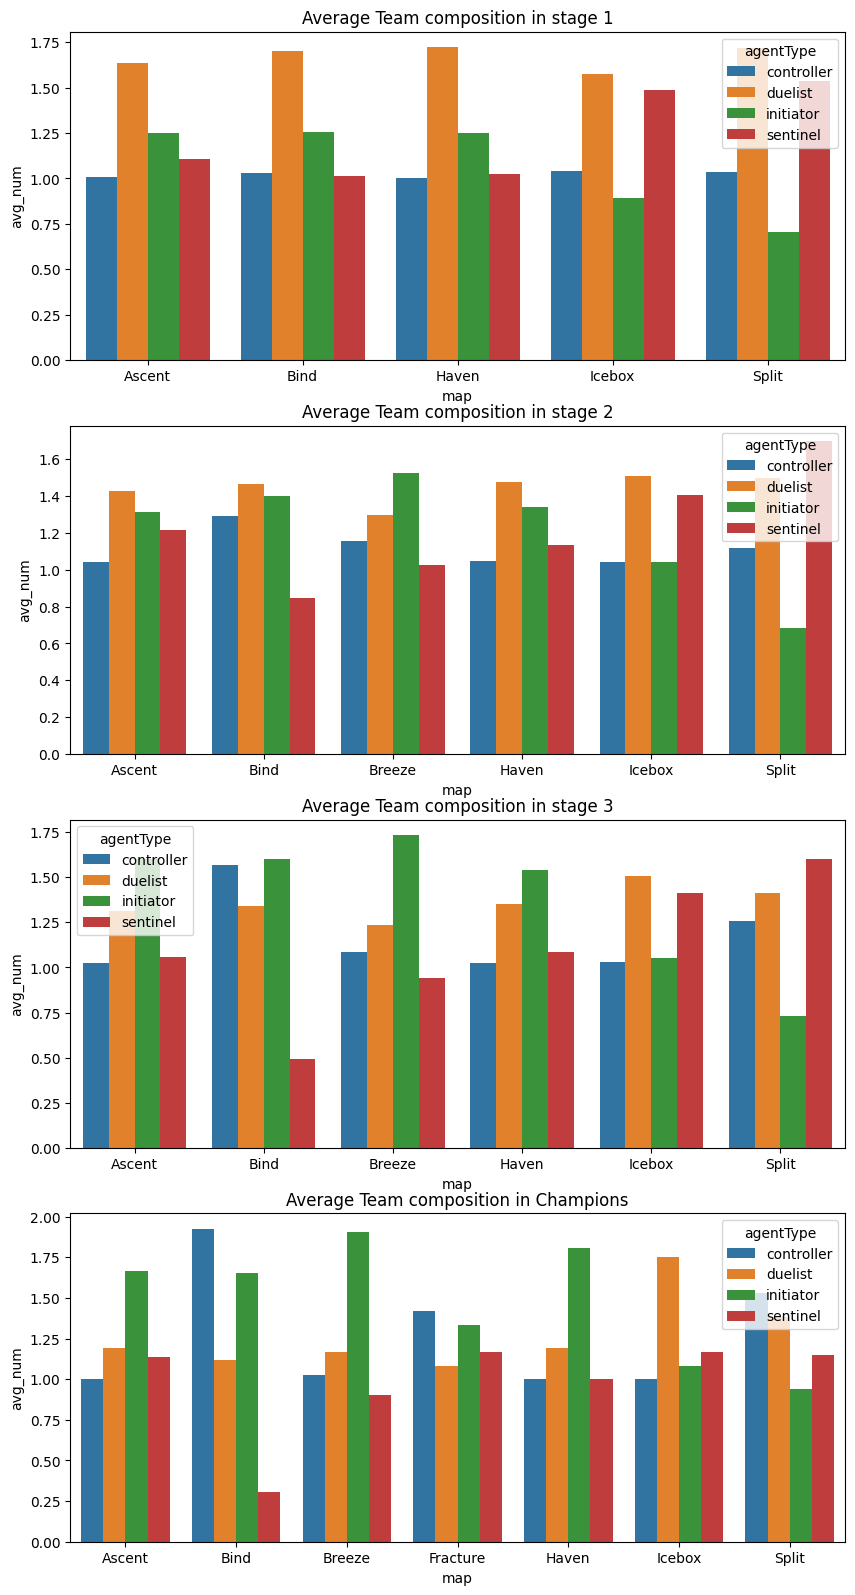

In [49]:
graphdata = data.groupby(['stage', 'map'])['agentType'].value_counts(normalize=True).mul(5).unstack(fill_value=0).drop('unsorted').reset_index()
graphdata = pd.melt(graphdata, id_vars=['map', 'stage'], value_name='avg_num')
fig, ax = plt.subplots(figsize=(10, 20), dpi=100, nrows=4)
sns.barplot(data=graphdata[graphdata['stage']=='stage1'], x='map', y='avg_num', hue='agentType', ax=ax[0]).set_title('Average Team composition in stage 1')
sns.barplot(data=graphdata[graphdata['stage']=='stage2'], x='map', y='avg_num', hue='agentType', ax=ax[1]).set_title('Average Team composition in stage 2')
sns.barplot(data=graphdata[graphdata['stage']=='stage3'], x='map', y='avg_num', hue='agentType', ax=ax[2]).set_title('Average Team composition in stage 3')
sns.barplot(data=graphdata[graphdata['stage']=='champions'], x='map', y='avg_num', hue='agentType', ax=ax[3]).set_title('Average Team composition in Champions')


### "Meta" for each map and stage

The top 5 most picked agents for each map

playerAgent             astra     breach  brimstone     cypher       jett  \
stage     map                                                               
champions Ascent    19.444444   0.000000   0.000000   4.444444  18.888889   
          Bind      16.153846   0.000000   3.846154   0.000000   9.230769   
          Breeze     0.000000   0.000000   0.476190  12.857143  20.000000   
          Fracture  15.000000  20.000000   3.333333  13.333333  11.666667   
          Haven     19.444444   7.777778   0.000000   6.666667  18.888889   
          Icebox     0.000000   0.000000   0.000000   0.000000  20.000000   
          Split     17.647059   6.470588   0.000000   7.058824  10.000000   
stage1    Ascent     0.000000   5.268240   2.467811   6.512876  16.984979   
          Bind       0.000000   5.267490   8.696845  13.799726  11.975309   
          Haven      0.000000   5.639205   2.514205  13.125000  16.619318   
          Icebox     0.000000   1.019108   1.464968   1.878981  17.133758   
          Split      0.000000  11.699346   2.941176   9.281046  13.442266   
stage2    Ascent     6.163201   3.162024   0.729698   4.954884  15.307964   
          Bind       5.309179   3.125604   6.879227   8.570048   8.705314   
          Breeze     0.881459   0.547112   0.516717   9.665653  18.176292   
          Haven      6.128064   3.981991   0.940470  11.685843  15.567784   
          Icebox     0.403818   0.374449   0.205580   0.690162  17.584435   
          Split      6.222222   8.365079   1.436508   9.047619  10.555556   
stage3    Ascent    13.349282   1.578947   0.095694   3.684211  17.846890   
          Bind      10.294118   3.088235   7.009804   1.813725   7.892157   
          Breeze     0.666667   0.095238   0.476190  12.571429  19.333333   
          Haven     12.994350   3.502825   0.282486   8.700565  19.039548   
          Icebox     0.182927   0.487805   0.060976   0.304878  19.512195   
          Split     13.877551   5.510204   0.748299   6.870748  11.904762   

playerAgent             kayo    killjoy       omen   phoenix       raze  \
stage     map                                                             
champions Ascent    5.555556  15.000000   0.555556  0.000000   0.555556   
          Bind      3.076923   0.769231   0.000000  0.000000  11.538462   
          Breeze    7.142857   5.238095   0.000000  0.000000   0.000000   
          Fracture  1.666667   6.666667   0.000000  0.000000  10.000000   
          Haven     1.111111  13.333333   0.555556  1.111111   1.666667   
          Icebox    1.666667   4.444444   0.000000  0.000000   2.777778   
          Split     1.176471   8.235294   2.352941  0.000000  14.117647   
stage1    Ascent    0.000000  12.328326  17.542918  3.047210   5.826180   
          Bind      0.000000   3.923182  11.179698  4.115226  15.349794   
          Haven     0.000000   5.454545  17.457386  6.363636   6.803977   
          Icebox    0.000000  12.579618  10.923567  0.796178   6.878981   
          Split     0.000000   9.237473  16.949891  1.111111  16.535948   
stage2    Ascent    0.823852  13.413103  13.079639  3.601412   5.861122   
          Bind      0.623188   3.681159   7.560386  2.342995  15.545894   
          Breeze    0.273556   2.765957   1.732523  0.364742   0.151976   
          Haven     0.900450   7.048524  12.946473  4.957479   5.932966   
          Icebox    0.323054   8.847283   4.082232  0.256975   4.126285   
          Split     0.738095   8.936508  12.079365  0.388889  15.904762   
stage3    Ascent    2.248804  14.210526   6.698565  2.488038   2.918660   
          Bind      1.813725   2.696078   2.647059  0.392157  15.588235   
          Breeze    0.476190   4.000000   0.571429  0.000000   0.095238   
          Haven     1.525424  10.169492   6.779661  3.559322   1.807910   
          Icebox    0.121951   9.146341   0.609756  0.000000   2.195122   
          Split     2.244898  10.748299   5.374150  0.068027  13.265306   

playerAgent             reyna       sage      

### Win rates of team compositions that follow the "meta"

In [91]:
plotdata = pd.melt(agentpickrate.reset_index(), id_vars=['map', 'stage'], value_name='agentPickRate')
plotdata.groupby(['map', 'stage']).apply(lambda x: x[['playerAgent', 'agentPickRate']].sort_values(by='agentPickRate', ascending=False).head(5))

playerAgent  agentPickRate
map    stage                                   
Ascent champions 312        sova      20.000000
                 0         astra      19.444444
                 96         jett      18.888889
                 144     killjoy      15.000000
                 288        skye       7.777778
...                          ...            ...
Split  stage3    287        sage      14.353741
                 23        astra      13.877551
                 239        raze      13.265306
                 119        jett      11.904762
                 167     killjoy      10.748299

[120 rows x 2 columns]

## Map Pick and Ban rates

In [14]:
#import mappick data here
mappickdf = pd.read_csv('scrapy/vlrgg/mappickData/mapPick.csv')
mappickdf.head()

,team,decision,map,matchID,gameID,date
0,GMB,ban,Bind,ACEvsGMB12-12-21,ACEvsGMB12-12-21Bind,12-12-21
1,ACE,ban,Haven,ACEvsGMB12-12-21,ACEvsGMB12-12-21Haven,12-12-21
2,GMB,pick,Breeze,ACEvsGMB12-12-21,ACEvsGMB12-12-21Breeze,12-12-21
3,ACE,pick,Ascent,ACEvsGMB12-12-21,ACEvsGMB12-12-21Ascent,12-12-21
4,GMB,pick,Fracture,ACEvsGMB12-12-21,ACEvsGMB12-12-21Fracture,12-12-21


In [92]:
#combining results with the map pick
mappickdf = pd.read_csv('scrapy/vlrgg/mappickData/mapPick.csv').drop_duplicates()
mappickdf = mappickdf[mappickdf['decision']=='pick']
mappickdf['date'] = mappickdf['date'].apply(lambda x: datetime.strptime(x,'%d-%m-%y'))
mappickdf.rename(columns={'team':'playerTeam'}, inplace=True)
mappickwinrate = mappickdf.merge(data[['gameID','result', 'stage', 'playerTeam', 'event']].drop_duplicates(), on=['gameID', 'playerTeam'])
mappickwinrate.head()

,playerTeam,decision,map,matchID,gameID,date,result,stage,event
0,GMB,pick,Breeze,ACEvsGMB12-12-21,ACEvsGMB12-12-21Breeze,2021-12-12,Win,champions,VALORANT Champions
1,ACE,pick,Ascent,ACEvsGMB12-12-21,ACEvsGMB12-12-21Ascent,2021-12-12,Win,champions,VALORANT Champions
2,GMB,pick,Fracture,ACEvsGMB12-12-21,ACEvsGMB12-12-21Fracture,2021-12-12,Win,champions,VALORANT Champions
3,ACE,pick,Icebox,ACEvsGMB12-12-21,ACEvsGMB12-12-21Icebox,2021-12-12,Win,champions,VALORANT Champions
4,GXR,pick,Icebox,BRNvsGXR11-07-21,BRNvsGXR11-07-21Icebox,2021-07-11,Lose,stage2,Champions Tour Philippines Stage 3: Challengers 1


In [93]:
mappickwinrate.groupby(['stage', 'decision'])['result'].value_counts(normalize=True).mul(100).unstack(fill_value=0).drop('unsorted')

,result,Lose,Win
stage,decision,,
champions,pick,41.772152,58.227848
stage2,pick,46.233522,53.766478
stage3,pick,46.578366,53.421634


In [97]:
#win rate of teams that picked map in all final stages to see if teams are more strategic 
mappickwinrate[mappickwinrate['event'].isin(['Valorant Champions Tour Stage 2: Masters Reykjavik', 'Valorant Champions Tour Stage 3: Masters Berlin', 'VALORANT Champions'])].groupby(['stage', 'decision'])['result'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
#when it comes to international lans, games favor those who picked the map

,result,Lose,Win
stage,decision,,
champions,pick,42.000000,58.000000
stage2,pick,43.243243,56.756757
stage3,pick,38.983051,61.016949


In [17]:
#map pick and bans by stages
mappickdf = pd.read_csv('scrapy/vlrgg/mappickData/mapPick.csv').drop_duplicates()[['decision', 'map']]
mappickdf.groupby(['map'])['decision'].value_counts(normalize=True)
#next thing is to sort this by the stages and see what stages are banned the most
#see of the teams that pick new maps how often do they win
#can also create a visual on tableau

map       decision
Ascent    pick        0.754098
          ban         0.245902
Bind      pick        0.633013
          ban         0.366987
Breeze    ban         0.503205
          pick        0.496795
Fracture  ban         0.833333
          pick        0.166667
Haven     pick        0.729272
          ban         0.270728
Icebox    pick        0.542994
          ban         0.457006
Split     pick        0.544204
          ban         0.455796
Name: decision, dtype: float64

In [18]:
#next do winrates of teams that played in valorant champions
vc_teams = data[data['event']=='VALORANT Champions']['playerTeam'].unique()
teamData = data.groupby(['playerTeam', 'map', 'stage'])['result'].value_counts(normalize=True).mul(100).unstack(fill_value=0).reset_index()
teamData = teamData[teamData['playerTeam'].isin(vc_teams)]

Text(0.5, 1.0, 'Win Rate Champions')

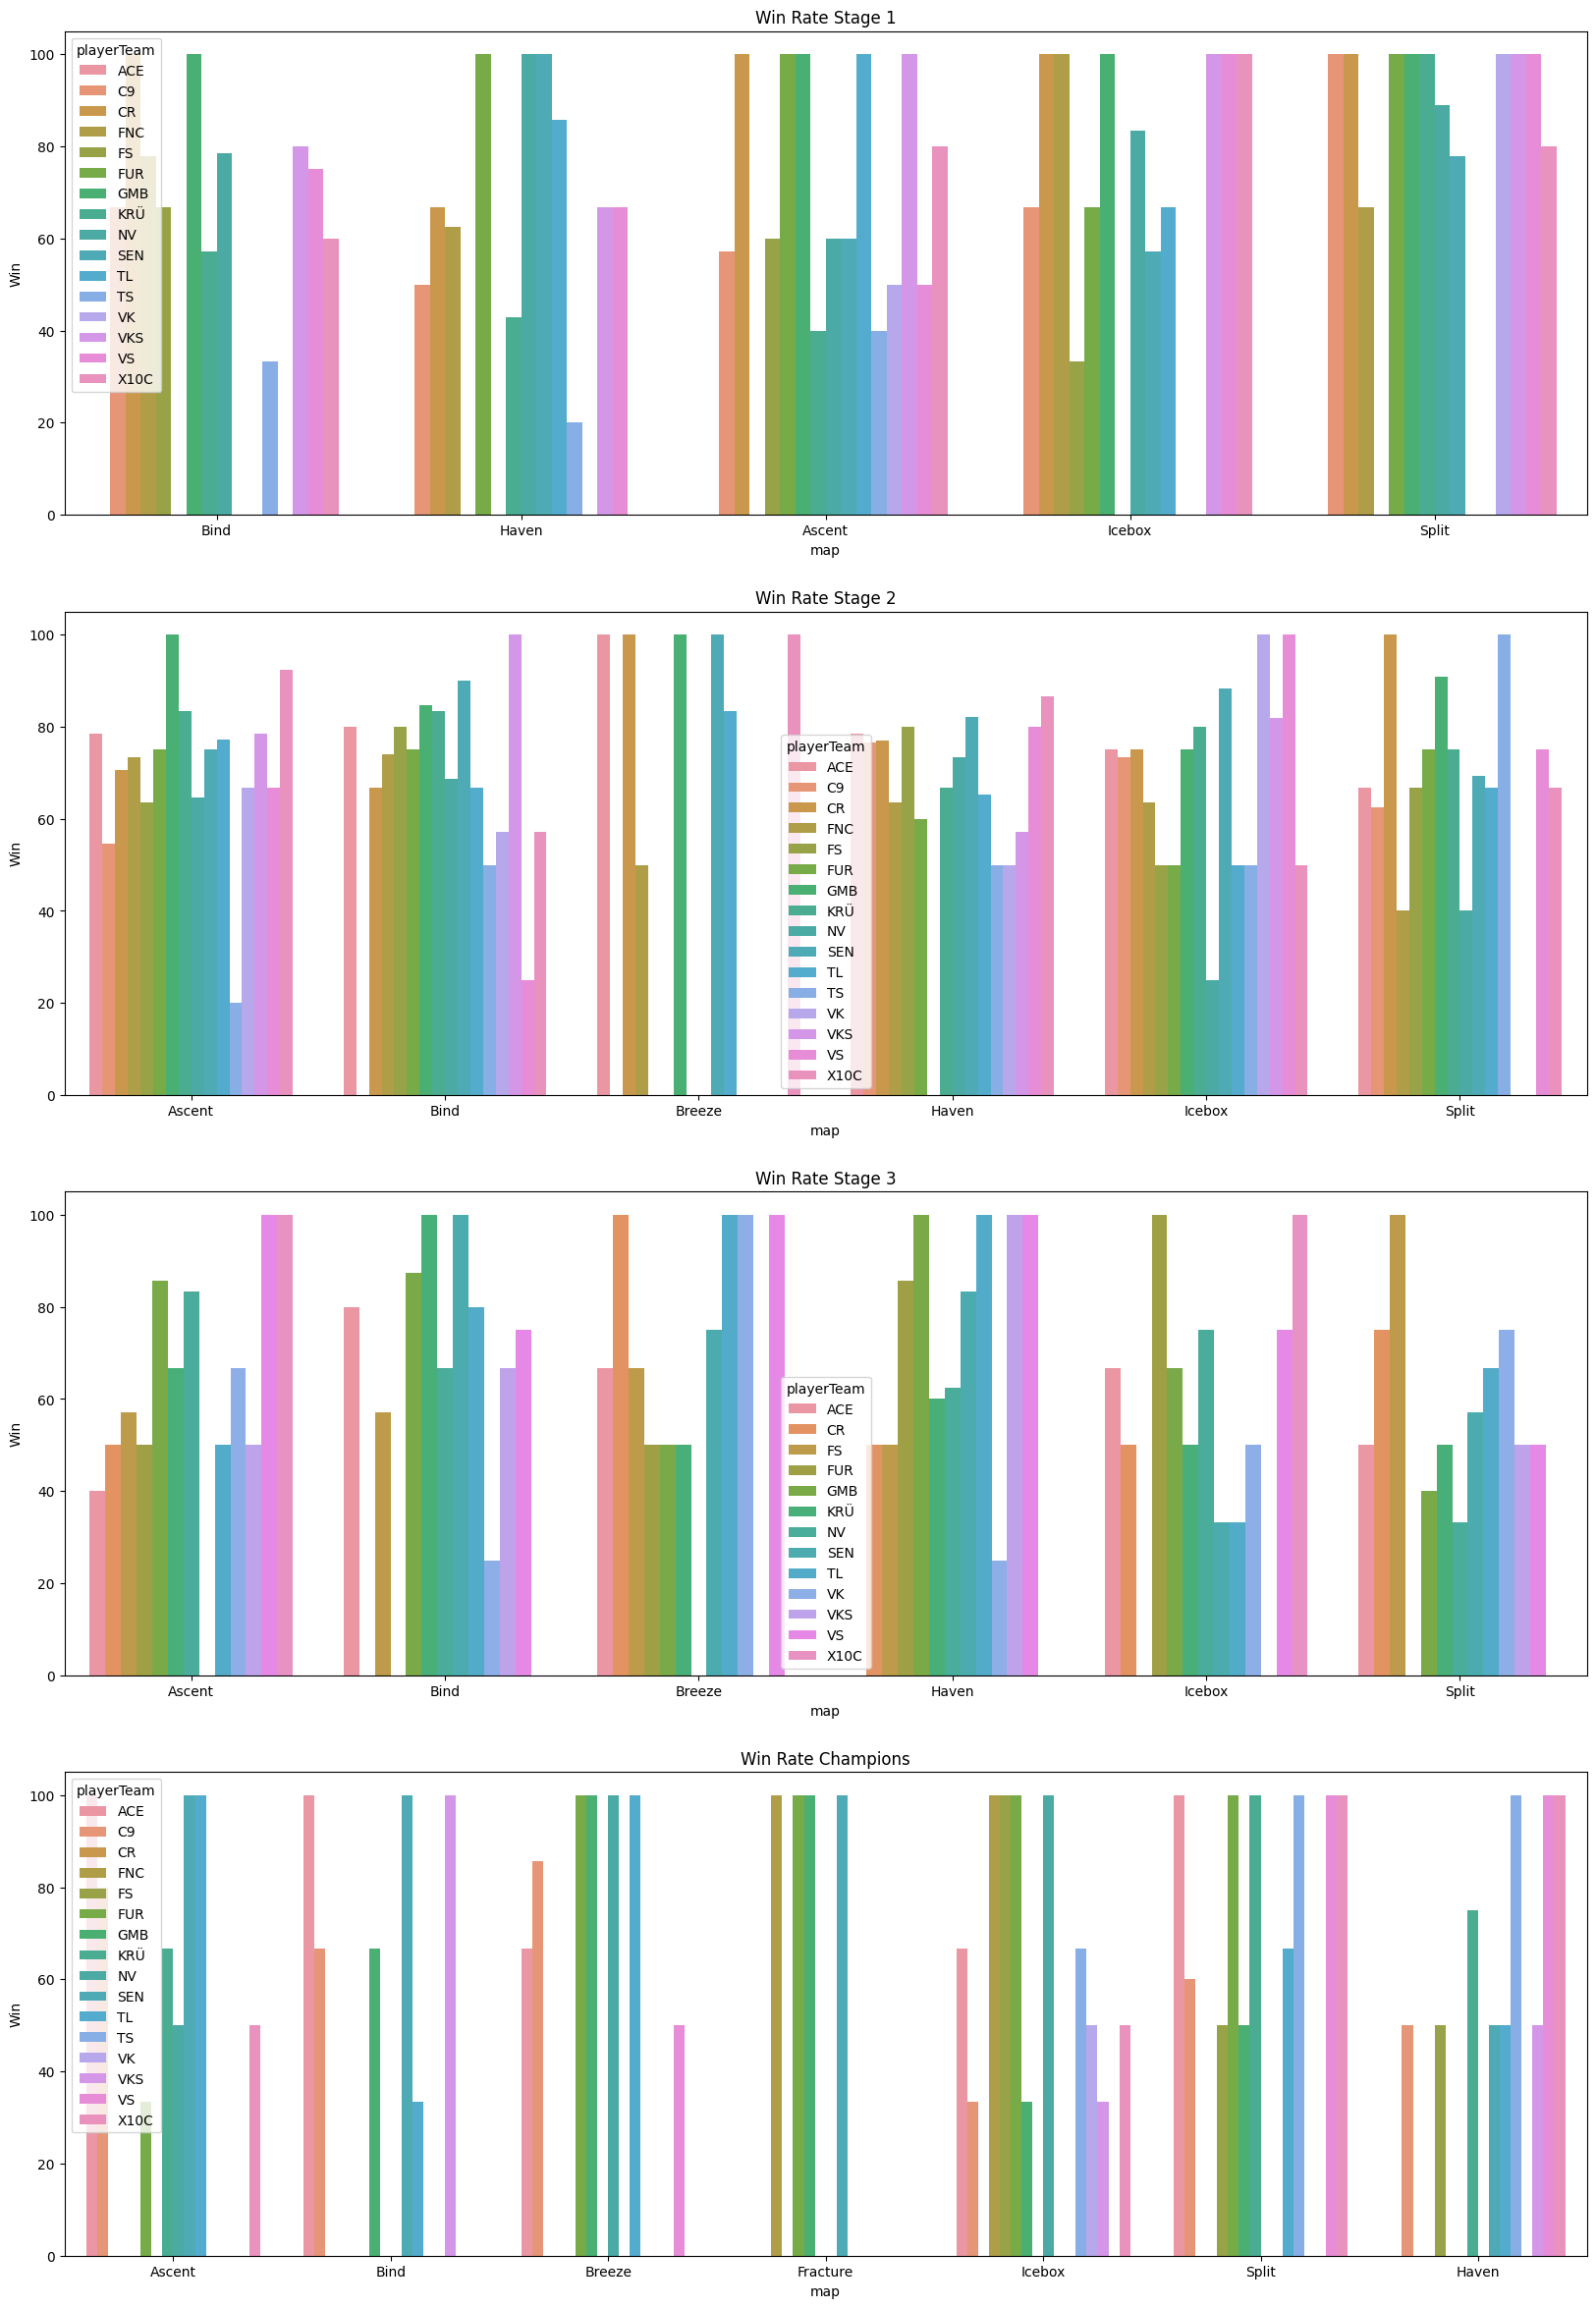

In [19]:
#plotting win rate for each team

stage1 = teamData[teamData['stage']=='stage1']
stage2 = teamData[teamData['stage']=='stage2']
stage3 = teamData[teamData['stage']=='stage3']
champions = teamData[teamData['stage']=='champions']
fig, ax = plt.subplots(figsize=(20, 30), dpi=100, nrows=4)

sns.barplot(data=stage1, x='map', y='Win', hue='playerTeam', ax=ax[0]).set_title('Win Rate Stage 1')
sns.barplot(data=stage2, x='map', y='Win', hue='playerTeam', ax=ax[1]).set_title('Win Rate Stage 2')
sns.barplot(data=stage3, x='map', y='Win', hue='playerTeam', ax=ax[2]).set_title('Win Rate Stage 3')
sns.barplot(data=champions, x='map', y='Win', hue='playerTeam', ax=ax[3]).set_title('Win Rate Champions')
#need to account for the fact that some maps are played more frequently than others
#might want to import bans and pick rates for each map